# **Gradient Descent Basics**
Learnt it using:<br>
**Reference: https://www.youtube.com/watch?v=ORyfPJypKuU&list=PLKnIA16_RmvZvBbJex7T84XYRmor3IPK1**

### **Introduction to Gradient Descent**
**It is of three types based on amount of data used for determination of gradient**
* Batch Gradient Descent
* Stochastic Gradient Descent
* Mini Batch Gradient Descent

**Note: Gradient descent discussed in this notebook is batch gradient descent**

In [27]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
 

In [28]:
X,y=make_regression(n_samples=4,n_features=1,n_informative=1,n_targets=1,noise=80,random_state=13)

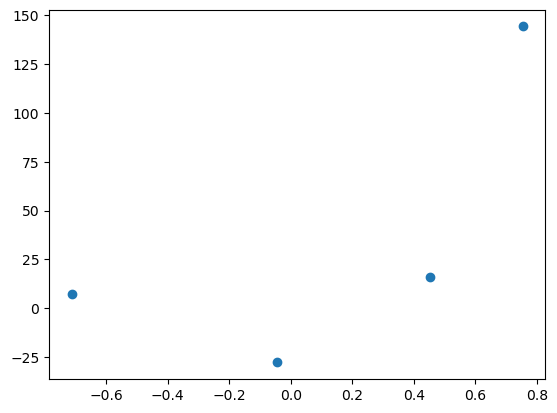

In [29]:
plt.scatter(X,y)

In [30]:
# lets apply ordinary least squares
from sklearn.linear_model import LinearRegression

In [31]:
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [32]:
reg.coef_

array([78.35063668])

In [33]:
reg.intercept_

26.15963284313262

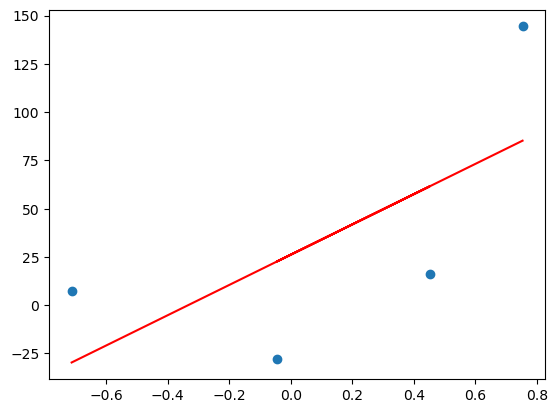

In [34]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color="red")

In [35]:
# let's apply gradient descent assuming slope is constant m=78.35
# let's assume the starting value for the intercept is b=0
b=[]
b.append(-589)
y_pred=((78.35*X)+b[0]).reshape(4)
y_pred

array([-644.81580837, -553.60050326, -592.48681619, -529.94240423])

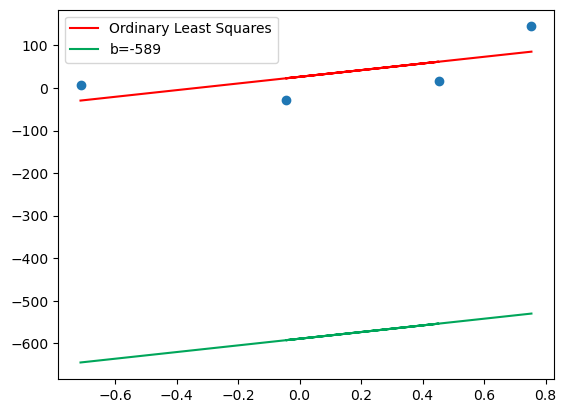

In [36]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color="red",label="Ordinary Least Squares")
plt.plot(X,y_pred,color="#00a65a",label=f"b={b[0]}")
plt.legend()
plt.show()

In [37]:
m=78.35
loss_slope=-2*(np.sum(y-m*X.ravel()-b[0]))
loss_slope

-4921.277634082092

In [38]:
# lets take the learning rate = 0.01
lr=0.1
step_size=loss_slope*lr
step_size

-492.1277634082092

In [39]:
# calculating the new intercept
b.append(b[0]-step_size)
b[1]

-96.8722365917908

In [40]:
y_pred1=((78.35*X)+b[1]).reshape(4)
y_pred1

array([-152.68804496,  -61.47273985, -100.35905278,  -37.81464082])

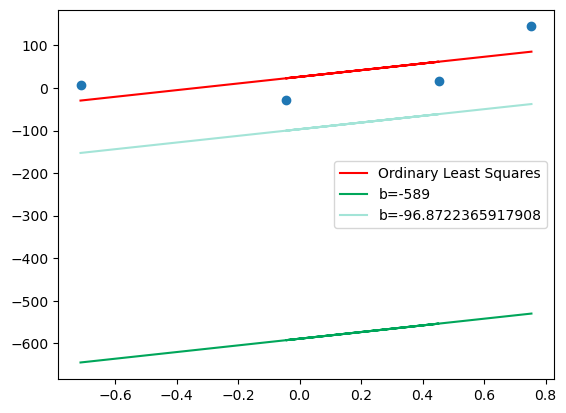

In [41]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color="red",label="Ordinary Least Squares")
plt.plot(X,y_pred,color="#00a65a",label=f"b={b[0]}")
plt.plot(X,y_pred1,color="#A3E4D7",label=f"b={b[1]}")
plt.legend()
plt.show()

In [42]:
# iteration 2
loss_slope=-2*(np.sum(y-m*X.ravel()-b[1]))
loss_slope

-984.2555268164185

In [43]:
step_size=loss_slope*lr
step_size

-98.42555268164186

In [44]:
b.append(b[1]-step_size)
b[2]

1.5533160898510658

In [45]:
y_pred2=((78.35*X)+b[2]).reshape(4)
y_pred2

array([-54.26249228,  36.95281283,  -1.9335001 ,  60.61091186])

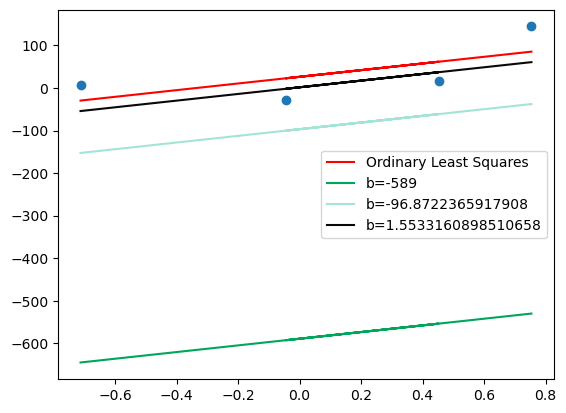

In [46]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color="red",label="Ordinary Least Squares")
plt.plot(X,y_pred,color="#00a65a",label=f"b={b[0]}")
plt.plot(X,y_pred1,color="#A3E4D7",label=f"b={b[1]}")
plt.plot(X,y_pred2,color="#080808",label=f"b={b[2]}")
plt.legend()
plt.show()

In [47]:
# iteration 3
loss_slope=-2*(np.sum(y-m*X.ravel()-b[2]))
loss_slope

-196.85110536328364

In [48]:
step_size=loss_slope*lr
step_size

-19.685110536328366

In [49]:
b.append(b[2]-step_size)
b[3]

21.238426626179432

In [50]:
y_pred3=((78.35*X)+b[3]).reshape(4)
y_pred3

array([-34.57738175,  56.63792337,  17.75161044,  80.29602239])

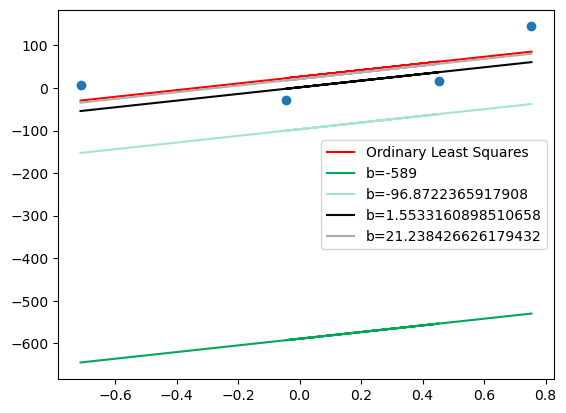

In [51]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color="red",label="Ordinary Least Squares")
plt.plot(X,y_pred,color="#00a65a",label=f"b={b[0]}")
plt.plot(X,y_pred1,color="#A3E4D7",label=f"b={b[1]}")
plt.plot(X,y_pred2,color="#080808",label=f"b={b[2]}")
plt.plot(X,y_pred3,color="#afafaf",label=f"b={b[3]}")
plt.legend()
plt.show()

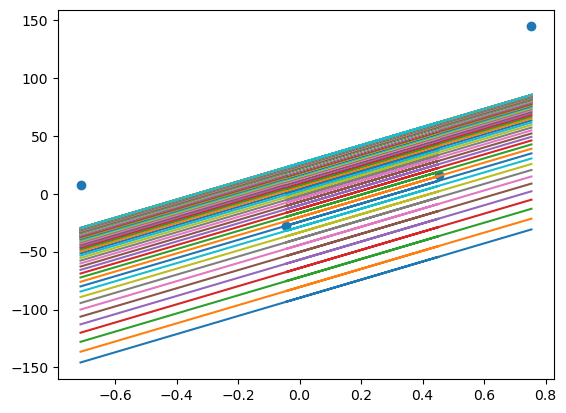

In [55]:
# Looping the process
b=-100
m=78.35
lr=0.01
epochs=100
for i in range(epochs):
    loss_slope=-2*(np.sum(y-m*X.ravel()-b))
    b=b-lr*loss_slope
    y_pred=m*X+b
    plt.plot(X,y_pred,label=f"b={b}")
plt.scatter(X,y)
# plt.legend()
plt.show()

### **Creating a class for gradient descent (linear-regression)**

In [114]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

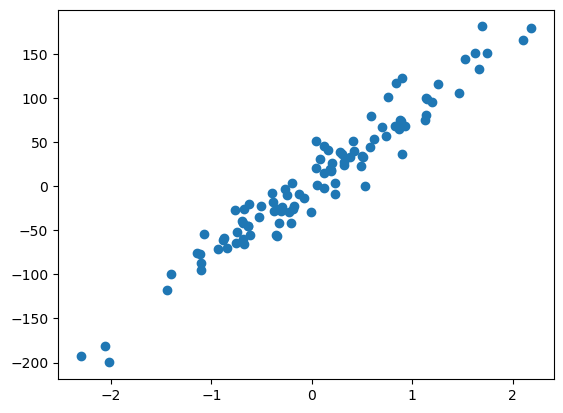

In [115]:
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,noise=20,random_state=1)
plt.scatter(X,y)

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
lr=LinearRegression()

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
lr.fit(X_train,y_train)

print(lr.coef_)
print(lr.intercept_)

y_pred=lr.predict(X_test)
r2_score(y_test,y_pred)

[82.79515796]
5.596731009555102


0.9408064464264344

In [107]:
class GDRegressor:

    def __init__(self,learning_rate,epochs):
        self.m=np.random.rand()*10
        self.b=np.random.rand()*10
        self.lr=learning_rate
        self.epochs=epochs

    def fit(self,X,y):
        # calculate the value for b using Gradient Descent
        for i in range(self.epochs):
            loss_slope_b=-2*np.sum(y-self.m*X.ravel()-self.b)
            loss_slope_m=-2*np.sum((y-self.m*X.ravel()-self.b)*X.ravel())
            self.b=self.b-self.lr*loss_slope_b
            self.m=self.m-self.lr*loss_slope_m
        print(self.m,self.b)

    def predict(self,X):
        return self.m*X+self.b

In [118]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [119]:
gd=GDRegressor(0.001,50)
gd.fit(X_train,y_train)

82.7039990243391 5.599660581548765


In [120]:
y_pred=gd.predict(X_test)
r2_score(y_test,y_pred)

0.9408557853133537